In [1]:
from math import *
import dspace
import dspace.plotutils
from matplotlib.pyplot import *
matplotlib.interactive(True)
# %matplotlib inline

## Example 1: a simple 2D system

In [2]:
f = ['X. =     alpha*X * X2*X3*X4 + X*X2 - X',
     'X2. = alpha^-1*X*X2*X3*X4 + X*X2 - X2']
eq = dspace.Equations(f)

In [3]:
ds = dspace.DesignSpace(eq)
ds

Model: Unnamed
Equations:
X.=alpha*X3*X4*X*X2+X*X2-X
X2.=alpha^-1*X3*X4*X*X2+X*X2-X2

In [4]:
ds.number_of_cases

4

In [5]:
ds.signature


'2121'

In [6]:
case_1 = ds(2)
cases = ds([2, 3, 4])
print case_1.case_signature
cases[0].equations

1121


X.=X*X2*alpha*X3*X4-X
X2.=X*X2-X2

In [7]:
case2, case3, case4 = cases
case3

Model: Unnamed: Case 3
Equations:
X.=X*X2-X
X2.=X*X2*alpha^-1*X3*X4-X2

In [8]:
case_1121 = ds('1121', by_signature=True)
case_1121

Model: Unnamed: Case 2
Equations:
X.=X*X2*alpha*X3*X4-X
X2.=X*X2-X2

In [9]:
case_1.conditions_log

log(alpha)+log(X3)+log(X4)>0
log(alpha)-log(X3)-log(X4)>0

In [10]:
case_1.boundaries_log

log(alpha)+log(X3)+log(X4)>0
log(alpha)-log(X3)-log(X4)>0

In [11]:
valid_cases = ds.valid_cases()
print 'All valid cases: ' + str(valid_cases)

All valid cases: ['1', '2', '3', '4']


In [12]:
valid_cases = ds.valid_cases(p_bounds={'alpha':10,
                                       'X3':[1e-3, 1e3],
                                       'X4':[1e-3, 1e3]
                                       })
print 'All valid cases within bounds: ' + str(valid_cases)

All valid cases within bounds: ['1', '2', '4']


In [13]:
# We loop over all the valid cases by their case number
for case_number in valid_cases:
    # Get the case object
    case = ds(case_number)
    # Print the case signature
    print str(case.case_number) + ':' + case.signature

1:1111
2:1121
4:2121


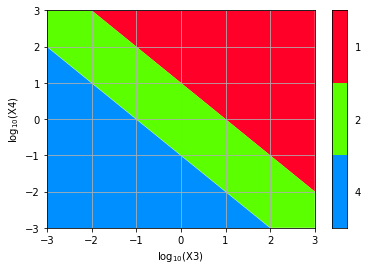

In [14]:
ivar_names = ds.independent_variables

pvals = dspace.VariablePool(names=ivar_names)
pvals['alpha'] = 10
pvals['X3'] = 1  # Will be a variable on an axis, value wont be affect plot
pvals['X4'] = 1  # Will be a variable on an axis, value wont be affect plot

clf()
fig = gcf()
ax = gca()
colors = ds.draw_2D_slice(ax,
                          pvals,       # Pass the reference parameter set.
                          'X3',        # The x-axis variable.
                          'X4',        # The y-axis variable.
                          [1e-3, 1e3], # Range on the x-axis.
                          [1e-3, 1e3], # Indicate the range on the y-axis.
                          )
grid(True)
show()

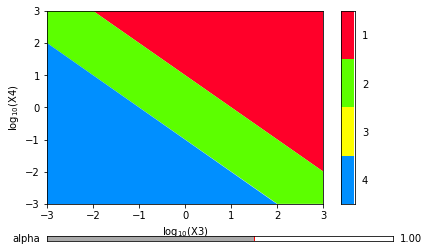

In [15]:
colors['3'] = (1, 1, 0)

ds.draw_2D_slice_interactive(
          pvals,                          # Pass the reference parameter set.
          'X3',                           # The x-axis variable.
          'X4',                           # The y-axis variable.
          [1e-3, 1e3],                    # The range on the x-axis.
          [1e-3, 1e3],                    # The range on the y-axis.
          {'alpha':[1e-5, 1e5]},          # Specify slider parameters and ranges
          color_dict = colors
          )

## Example 2: more advanced functions

In [16]:
f = ['X1. =     alpha*X5 + X1*X2 -     alpha*X1*X3*X4^-1 - X1',
     'X2. = (1/alpha)*X5 + X1*X2 - (1/alpha)*X2*X3*X4^-1 - X2',
     'X5 = X1*X2*X3*X4']
eq = dspace.Equations(f, auxiliary_variables=['X5'])

ds = dspace.DesignSpace(eq)
ds.signature

'222211'

In [17]:
valid_cases = ds.valid_cases(p_bounds={'alpha':10, 
                                       'X3':[1e-3, 1e3],
                                       'X4':[1e-3, 1e3]})

print 'All valid cases in slice: ' + str(valid_cases)

All valid cases in slice: ['1', '2', '3', '4', '6', '8', '11', '12', '16']


In [18]:
ivar_names = ds.independent_variables
print ivar_names
pvals = dspace.VariablePool(names=ivar_names)
pvals['alpha'] = 10
pvals['X3'] = 1  # Will be a variable on an axis, value wont be affect plot
pvals['X4'] = 1  # Will be a variable on an axis, value wont be affect plot

['alpha', 'X3', 'X4']


In [19]:
ds.dependent_variables

['X1', 'X2', 'X5']

In this example we will plot many different slices of the same dsign space. To get consistent colors for the different regions, we will use a global color scheme with all the valid cases included.

In [20]:
all_valid_cases = ds.valid_cases()
colors = dict()
for i in range(0, len(all_valid_cases)):
    colors[str(all_valid_cases[i])] = matplotlib.cm.hsv(float(i)/len(all_valid_cases))

temp = colors['6']
colors['6'] = colors['11']
colors['11'] = temp

We make the design space object plot a 2D slice with a specified x and y axis and a reference parameter set. To make the colors consistent across the figures we have included the colors from the previous plot by passing a color dictionary to the 'color_dict' keyword argument in the drawing method.

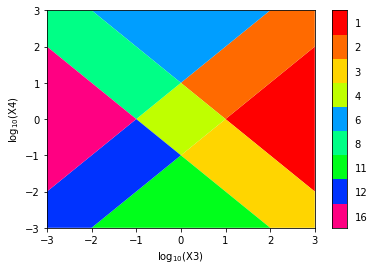

In [21]:
fig = figure(1)
clf()
ax = gca()
ds.draw_2D_slice(ax,
                 pvals,             # Pass the reference parameter set.
                 'X3',              # First, indicate the x-axis variable.
                 'X4',              # Second, indicate the y-axis variable.
                 [1e-3, 1e3],       # The range on the x-axis.
                 [1e-3, 1e3],       # The range on the y-axis.
                 color_dict=colors, # Specify a color dictionary for the cases.
                 )
sca(ax)

The verticesfor the 2D slice are obtained for case 4, the diamond in the center.


In [22]:
case4 = ds(4)
vertices = case4.vertices_2D_slice(pvals, 'X3', 'X4')
print vertices

[[10.0, 1.0], [1.0, 0.1], [0.1, 1.0], [1.0, 10.0]]


A bounding box can be obtained with specific constraints on the parameters, by passing parameter values or parameter ranges.


{'X3': [-1.0, 1.0], 'X4': [-1.0, 1.0]}


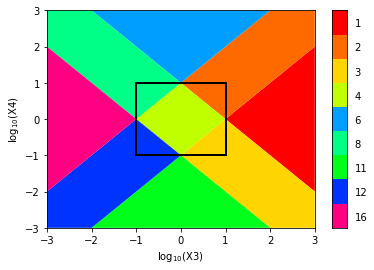

In [23]:
fig = figure(1)
clf()
ax = gca()
ds.draw_2D_slice(ax,
                 pvals,             # Pass the reference parameter set.
                 'X3',              # First, indicate the x-axis variable.
                 'X4',              # Second, indicate the y-axis variable.
                 [1e-3, 1e3],       # The range on the x-axis.
                 [1e-3, 1e3],       # The range on the y-axis.
                 color_dict=colors, # Specify a color dictionary for the cases.
                 )
sca(ax)

box = case4.bounding_box(p_bounds={'alpha':10, 
                                   'X3':[1e-3, 1e3],
                                   'X4':[1e-3, 1e3]}, 
                         log_out=True);
print box

x_vertices = [min(box['X3']), min(box['X3']),max(box['X3']), max(box['X3'])]
y_vertices = [min(box['X4']), max(box['X4']), max(box['X4']), min(box['X4'])]
fill(x_vertices, y_vertices,facecolor='none', edgecolor='k', linewidth=2.)